# Importing Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import zscore

#### SKlearn ####
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.cluster.hierarchy import dendrogram


# Part a-d last Question

In [2]:
df_customer = pd.read_csv('/content/drive/MyDrive/Data Mining/HW4/Wholesale customers data.csv')
df_customer

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
df_customer.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
df_customer.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There is no null value

In [4]:
z_score = zscore(df_customer[list(df_customer.columns)])
abs_z_scores = np.abs(z_score)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_customer = df_customer[filtered_entries]
df_customer

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [25]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(df_customer)
X.shape

(414, 8)

In [26]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X.shape

(414, 2)

In [27]:
df_reduced = pd.DataFrame(X, columns=['pc1', 'pc2'])
df_reduced.head()

,pc1,pc2
0,0.678720,-0.178696
1,0.712045,-0.166655
2,0.737491,-0.167136
3,-0.356956,-0.259620
4,0.618327,-0.198902


# Part a

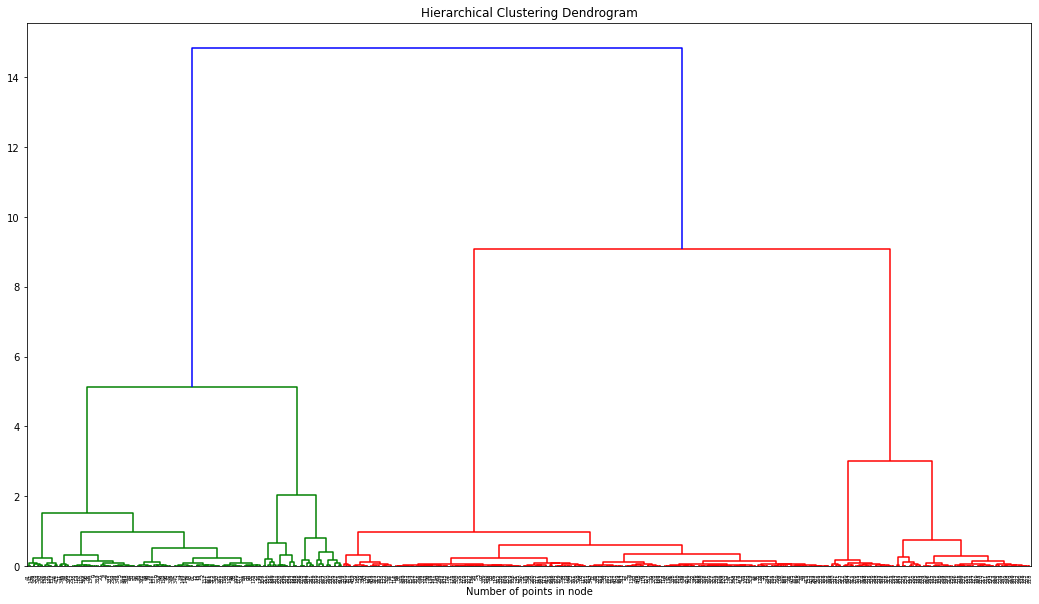

In [28]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
ward = AgglomerativeClustering(linkage="ward", distance_threshold=0, n_clusters=None)
ward = ward.fit(X)

plt.figure(figsize=(18, 10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(ward)
plt.xlabel("Number of points in node")
plt.show()

# Part b

Text(0.5, 1.0, 'Silhouette Average for different Clusterings')

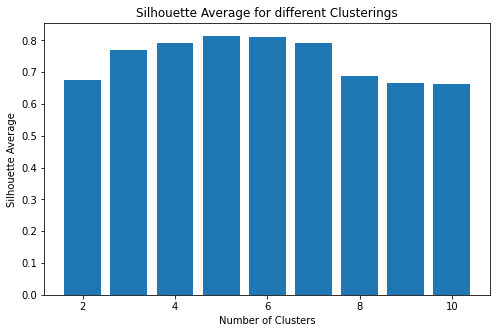

In [29]:
silhouette_avg_vals = []
for k in range(2, 11):
  clusterer = AgglomerativeClustering(linkage='ward', n_clusters=k, affinity="euclidean")
  cluster_labels = clusterer.fit_predict(df_reduced)
  # print(cluster_labels)
  silhouette_avg = silhouette_score(X, cluster_labels)
  silhouette_avg_vals.append(silhouette_avg)

fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(x=range(2, 11), height=silhouette_avg_vals)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Average")
plt.title("Silhouette Average for different Clusterings")

# Part c

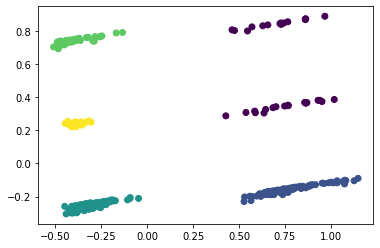

In [30]:
clusterer = AgglomerativeClustering(linkage='ward', n_clusters=5, affinity="euclidean")
y_pred = clusterer.fit_predict(df_reduced)
plt.scatter(df_reduced.iloc[:, 0], df_reduced.iloc[:, 1], c=y_pred)

# Part d

In [31]:
df_reduced['labels'] = clusterer.labels_
df1 = df_reduced.groupby('labels').describe().T
df1

labels             0          1           2          3          4
pc1 count  33.000000  97.000000  201.000000  56.000000  27.000000
    mean    0.730236   0.771287   -0.327134  -0.404418  -0.389311
    std     0.156289   0.138220    0.063967   0.081552   0.032444
    min     0.428090   0.527158   -0.448453  -0.508485  -0.446596
    25%     0.629182   0.672705   -0.367193  -0.463910  -0.406107
    50%     0.729482   0.742363   -0.342961  -0.435958  -0.391605
    75%     0.860878   0.840734   -0.299626  -0.374994  -0.381524
    max     1.017859   1.147341   -0.046796  -0.133943  -0.305299
pc2 count  33.000000  97.000000  201.000000  56.000000  27.000000
    mean    0.571897  -0.158487   -0.256017   0.740705   0.240017
    std     0.254025   0.027458    0.016350   0.018241   0.009870
    min     0.287960  -0.230151   -0.305004   0.693553   0.220682
    25%     0.347317  -0.176947   -0.264949   0.731470   0.231973
    50%     0.382102  -0.160252   -0.255558   0.739614   0.241485
    75%     0.841151  -0.142837   -0.247273   0.747033   0.247278
    max     0.890406  -0.090007   -0.206324   0.791866   0.257945